# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
#env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
#print('Number of agents:', len(env_info.agents))

# number of actions
#action_size = brain.vector_action_space_size
#print('Number of actions:', action_size)

# examine the state space 
#state = env_info.vector_observations[0]
#print('States look like:', state)
#state_size = len(state)
#print('States have length:', state_size)

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
#env_info = env.reset(train_mode=False)[brain_name] # reset the environment
#state = env_info.vector_observations[0]            # get the current state
#score = 0                                          # initialize the score
#while True:
#    action = np.random.randint(action_size)        # select an action
#    env_info = env.step(action)[brain_name]        # send the action to the environment
#    next_state = env_info.vector_observations[0]   # get the next state
#    reward = env_info.rewards[0]                   # get the reward
#    done = env_info.local_done[0]                  # see if episode has finished
#    score += reward                                # update the score
#    state = next_state                             # roll over the state to next time step
#    if done:                                       # exit loop if episode finished
#        break
    
#print("Score: {}".format(score))

When finished, you can close the environment.

In [6]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
import torch
import math
from dqn_agent import Agent
from collections import deque
import time
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

def dqn(n_episodes=2000, eps_start=0.99, eps_end=0.01, eps_decay=0.999, train_num=0):
    """
    Deep Q-learning.
    Parameters:
    --------------------------------------------------------------------------------------------------
    n_episodes: max training episodes
    eps_start: value of epsilon at the beginning for epsilon-greedy policy
    eps_end: value of epsilon at the end for epsilon-greedy policy
    eps_decay: multiplicative decay after each episode
    """
    
    start_time = time.time()
    scores = []
    scores_window = deque(maxlen=100)                                                      #last 100 scores
    eps = eps_start                                                                        #initialize epsilon
    
    for i in range(1,n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]                                            #current state
        score = 0
        done = False                                                                       #boolean to store progress
        
        while not done:                                                                    
            action = agent.act(state, eps)                                                 #next action
            action = int(action)
            env_info = env.step(action)[brain_name]                                        #send action to environment
            next_state = env_info.vector_observations[0]                                   #get next state                                                
            reward = env_info.rewards[0]                                                   #compute reward
            done = env_info.local_done[0]                                                  #done=True when episode ends
            agent.step(state, action, reward, next_state, done)                            #next step
            score += reward
            state = next_state
            if done:
                break
        
        scores_window.append(score)
        scores.append(score)
        eps = max(eps_end, eps_decay*eps)                                                  #epsilon decay
        
        count = 0                                                                          #count how many times score exceeded 15
        for j in range(len(scores_window)):
            if scores_window[j] >= 15:
                count += 1
        elapsed = datetime.timedelta(seconds=time.time()-start_time)
        print('\rEpisode: {}, elapsed: {}, Avg.Score: {:.2f},  score {}, How many scores >= 15: {}, eps.: {:.2f}'. \
            format(i, elapsed, np.mean(scores_window), score, count, eps), end="")
        
        if np.mean(scores_window) >=13:                                                    # check completion criteria.
            print("\n terminating at episode :", i_episode, "avg reward reached +15 over 100 episodes")
            break
            
    torch.save(agent.qnetwork_local.state_dict(), 'weights_'+str(train_num)+'.trn')       # save the weights into the file 
    return scores, i

### 5. Using different hyperparameters
We use different parameters for fc1_units, fc2_units, eps_start. We use _torch.save_ to save model weights at the end of each session, with weights files named 'weights_'+str(train_numb)+'.trn' such as weights_0.trn, weights_1.trn etc.

fc1_units:  80 , fc2_units:  72
train_num:  0 eps_start:  0.989
Episode: 2000, elapsed: 0:47:17.485940, Avg.Score: 11.59,  score 12.0, How many scores >= 15: 17, eps.: 0.13

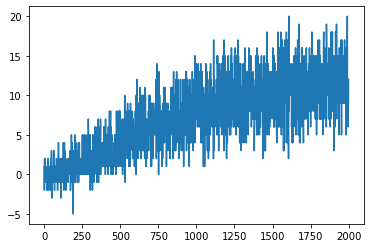


###############################################

fc1_units:  80 , fc2_units:  80
train_num:  1 eps_start:  0.998
Episode: 2000, elapsed: 0:45:05.674792, Avg.Score: 11.96,  score 9.0, How many scores >= 15: 26, eps.: 0.134

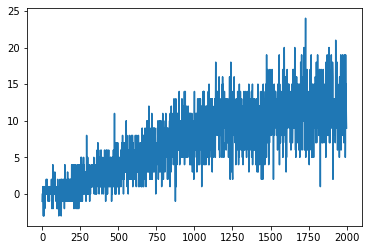


###############################################

fc1_units:  80 , fc2_units:  72
train_num:  2 eps_start:  0.988
Episode: 2000, elapsed: 0:45:17.810554, Avg.Score: 12.43,  score 11.0, How many scores >= 15: 29, eps.: 0.13

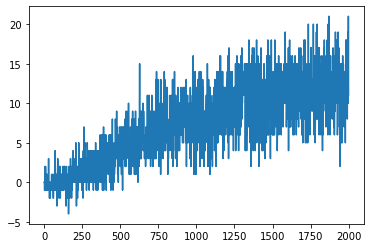


###############################################

fc1_units:  112 , fc2_units:  112
train_num:  3 eps_start:  0.991
Episode: 2000, elapsed: 0:45:30.095643, Avg.Score: 11.53,  score 16.0, How many scores >= 15: 17, eps.: 0.13

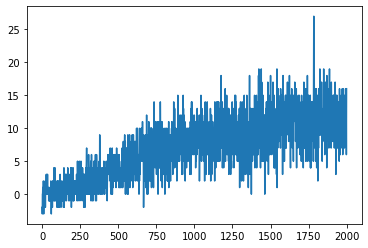


###############################################

fc1_units:  112 , fc2_units:  120
train_num:  4 eps_start:  0.994
Episode: 2000, elapsed: 0:45:28.997457, Avg.Score: 11.86,  score 13.0, How many scores >= 15: 23, eps.: 0.13

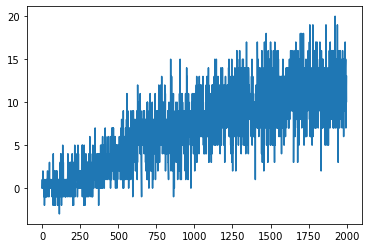


###############################################



In [8]:
import random

list_fc1_units = []
list_fc2_units = []
list_eps_start = []
list_episodes  = []

train_nums = 5
for i in range(0, train_nums):
    #generate random number of nodes
    fc1_nodes = random.randrange(64, 128, 16)                                           # possible numbers > 37
    fc2_nodes = random.randrange(fc1_nodes - 16 , fc1_nodes + 16, 8)                    # possible numbers  with step 8 

    #randomly initialize epsilon
    epsilon_start = random.randrange(988, 999, 1)/1000.
    
    print('fc1_units: ', fc1_nodes, ', fc2_units: ', fc2_nodes)
    print('train_num: ', i, 'eps_start: ',epsilon_start)
    agent = Agent(state_size=37, action_size=4, seed=1, fc1_units=fc1_nodes, fc2_units=fc2_nodes)
    scores, episodes = dqn(n_episodes = 2000, eps_start = epsilon_start, train_num=i)  # train with current params
    list_fc1_units.append(fc1_nodes)
    list_fc2_units.append(fc2_nodes)
    list_eps_start.append(epsilon_start)
    list_episodes.append(episodes)
    plt.plot(scores)
    plt.show()
    print("\n###############################################\n")


In [5]:
env.close()